In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ge-2024-results/GE_2024_Results (1).csv


In [2]:
df = pd.read_csv('/kaggle/input/ge-2024-results/GE_2024_Results (1).csv')
df

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JOE BIDEN,Congress,NaN,NaN,NaN,NaN,Lost
4,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost
...,...,...,...,...,...,...,...,...,...,...
8901,8899,West Bengal,Uluberia,NIKHIL BERA,Socialist Unity Centre Of India (COMMUNIST),2095,12,2107.0,0.15,Lost
8902,8900,West Bengal,Uluberia,AMAL KUMAR BARMAN,Independent,1997,3,2000.0,0.14,Lost
8903,8904,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Hillary Clinton,Congress,NaN,NaN,NaN,NaN,Lost
8904,8901,West Bengal,Uluberia,RAMPRASAD GHORAI,Indian Unity Centre,1568,4,1572.0,0.11,Lost


In [3]:
df.shape

(8906, 10)

In [4]:
df.head(20)

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JOE BIDEN,Congress,NaN,NaN,NaN,NaN,Lost
4,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost
5,5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203.0,1.09,Lost
6,6,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K J B SELVARAJ,All India Anna Dravida Munnetra Kazhagam,911,3,914.0,0.45,Lost
7,7,Andaman & Nicobar Islands,Andaman & Nicobar Islands,DR ARUN KUMAR MALLIK,Bahujan Samaj Party,714,5,719.0,0.36,Lost
8,8,Andaman & Nicobar Islands,Andaman & Nicobar Islands,RINKU MALA MONDAL,Independent,539,3,542.0,0.27,Lost
9,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JUSTIN TRUDEAU,Congress,NaN,NaN,NaN,NaN,Lost


In [8]:
df.columns

Index(['State', 'Constituency', 'Candidate', 'Party', 'EVM Votes',
       'Postal Votes', 'Total Votes', '% of Votes', 'Result'],
      dtype='object')

In [11]:
df_new = df.dropna()

In [12]:
df.head()

,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58,Won
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JOE BIDEN,Congress,NaN,NaN,NaN,NaN,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost


In [15]:
df_new.reset_index(drop=True,inplace = True)
df_new

,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58,Won
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203.0,1.09,Lost
...,...,...,...,...,...,...,...,...,...
8897,West Bengal,Uluberia,SK. SAPIYAR ALI,Independent,2924,-,2924.0,0.21,Lost
8898,West Bengal,Uluberia,NIKHIL BERA,Socialist Unity Centre Of India (COMMUNIST),2095,12,2107.0,0.15,Lost
8899,West Bengal,Uluberia,AMAL KUMAR BARMAN,Independent,1997,3,2000.0,0.14,Lost
8900,West Bengal,Uluberia,RAMPRASAD GHORAI,Indian Unity Centre,1568,4,1572.0,0.11,Lost


In [17]:
df_new.shape

(8902, 9)

In [18]:
df.shape

(8906, 9)

In [21]:
df = df_new
df.shape

(8902, 9)

In [23]:
df1 = df.loc[df["State"]== "Telangana"]
df1.sort_values(["Total Votes"],ascending = False)
df1.head()

,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
6800,Telangana,Adilabad,GODAM NAGESH,Bharatiya Janata Party,558936,9232,568168.0,45.98,Won
6801,Telangana,Adilabad,ATHRAM SUGUNA,Indian National Congress,472333,5183,477516.0,38.65,Lost
6802,Telangana,Adilabad,ATHRAM SAKKU,Bharat Rashtra Samithi,136463,837,137300.0,11.11,Lost
6803,Telangana,Adilabad,MALOTHU SYAMLAL NAYAK,Alliance of Democratic Reforms Party,7489,10,7499.0,0.61,Lost
6804,Telangana,Adilabad,MESRAM JANGUBAPU,Bahujan Samaj Party,6689,55,6744.0,0.55,Lost


In [27]:
grouping = df.groupby('State')
grouping 

In [35]:
totalVotes = grouping['Total Votes'].sum()
df2 = totalVotes.reset_index()
df2



,State,Total Votes
0,Andaman & Nicobar Islands,202514.0
1,Andhra Pradesh,33729342.0
2,Arunachal Pradesh,723247.0
3,Assam,20059870.0
4,Bihar,43448949.0
5,Chandigarh,449275.0
6,Chhattisgarh,15061348.0
7,Dadra & Nagar Haveli and Daman & Diu,297998.0
8,Goa,906538.0
9,Gujarat,29115599.0


In [37]:
total = df2["Total Votes"].sum()
df2["% of Votes"]= (df2["Total Votes"]/total)*100
df2

,State,Total Votes,% of Votes
0,Andaman & Nicobar Islands,202514.0,0.031380
1,Andhra Pradesh,33729342.0,5.226410
2,Arunachal Pradesh,723247.0,0.112068
3,Assam,20059870.0,3.108306
4,Bihar,43448949.0,6.732478
5,Chandigarh,449275.0,0.069616
6,Chhattisgarh,15061348.0,2.333778
7,Dadra & Nagar Haveli and Daman & Diu,297998.0,0.046175
8,Goa,906538.0,0.140469
9,Gujarat,29115599.0,4.511504


In [39]:
df2.sort_values(['Total Votes'],ascending=False,inplace = True)
df2.head()

,State,Total Votes,% of Votes
33,Uttar Pradesh,87911642.0,13.622036
35,West Bengal,60483687.0,9.372035
19,Maharashtra,57179133.0,8.859989
30,Tamil Nadu,43674048.0,6.767357
4,Bihar,43448949.0,6.732478


In [40]:
df2.columns

Index(['State', 'Total Votes', '% of Votes'], dtype='object')

In [41]:
df.columns

Index(['State', 'Constituency', 'Candidate', 'Party', 'EVM Votes',
       'Postal Votes', 'Total Votes', '% of Votes', 'Result'],
      dtype='object')

In [43]:
party_group = df.groupby('Party')
total_Votes = party_group['Total Votes'].sum()
df3 = total_Votes.reset_index()
df3.sort_values(['Total Votes'],ascending=False,inplace = True)
df3.head()


,Party,Total Votes
158,Bharatiya Janata Party,235973935.0
289,Indian National Congress,136759064.0
617,Samajwadi Party,29549381.0
69,All India Trinamool Congress,28213393.0
282,Independent,17844442.0


In [54]:
lost = df[df["Result"]=="Lost"]
lost
candidate_group = lost.groupby('Candidate')
total_Votes = candidate_group['Total Votes'].sum()
df4 = total_Votes.reset_index()
df4.sort_values(['Total Votes'],ascending=False,inplace = True)
df4.head()


,Candidate,Total Votes
4513,NOTA,6372220.0
1546,D K SURESH,809355.0
4491,NISITH PRAMANIK,749125.0
5177,RAJ BABBAR,733257.0
5049,PROFESSOR M.V RAJEEV GOWDA,726573.0


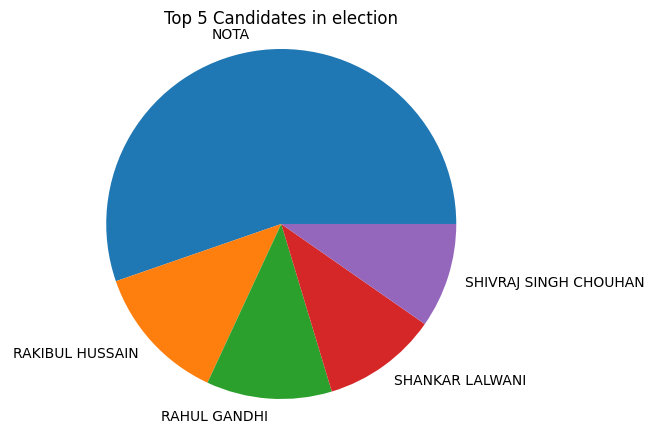

In [61]:
candidate_groups = df.groupby('Candidate')
total_Votes = candidate_groups['Total Votes'].sum()
df5 = total_Votes.reset_index()
df5.sort_values(['Total Votes'],ascending=False,inplace = True)
df6 = df5.head()
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.pie(df6['Total Votes'], labels=df6['Candidate'])
plt.title('Top 5 Candidates in election')
plt.axis('equal')
plt.show()

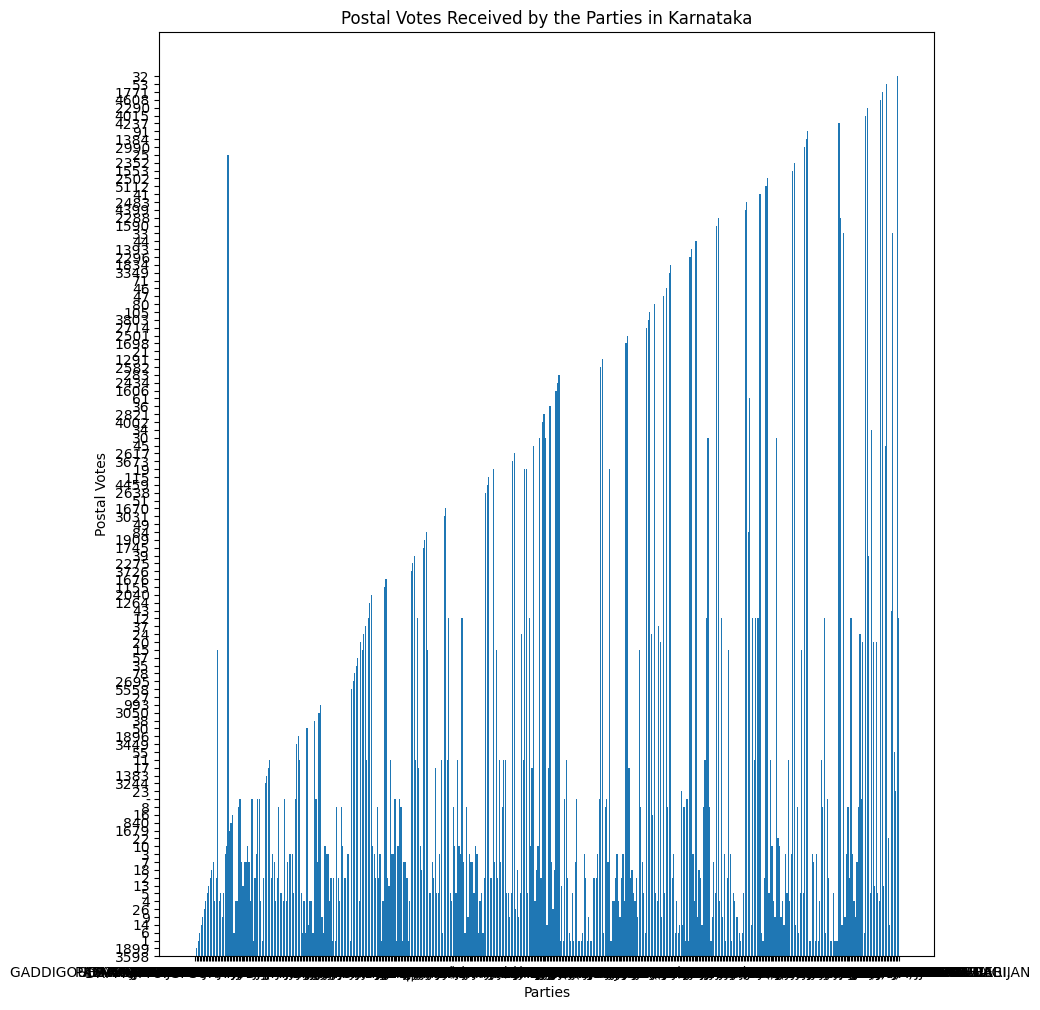

In [73]:
plt.figure(figsize=(10, 12))
df_karnataka = df[df['State'] == 'Karnataka']
df_karnataka
plt.bar(df_karnataka['Candidate'], df_karnataka['Postal Votes'])
plt.ylabel("Postal Votes")
plt.xlabel("Parties")
plt.title("Postal Votes Received by the Parties in Karnataka")
plt.show()

